### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Importing the csv file

In [2]:
fname='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(fname).dropna(how='all')

#### Displaying first three elments of the file

In [3]:
df.head(3)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


#### Displaying Data types of all files

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Generating descriptive statisctics

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Removing columns 'id' and 'Unnamed :0'

In [6]:
df.drop(columns=["id", "Unnamed: 0"],inplace =True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Using value_counts to get counts of unique ranges

In [8]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#### Replacing NaN values or null values from 'bedrooms and bathrooms' columns with their mean

In [9]:
x=df['bedrooms'].isnull().sum()
y=df['bathrooms'].isnull().sum()
x,y

(13, 10)

In [10]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [11]:
x=df['bedrooms'].isnull().sum()
y=df['bathrooms'].isnull().sum()
x,y

(0, 0)

#### Plotting a Boxplot for Waterfront vs Price

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Waterfront vs Price')

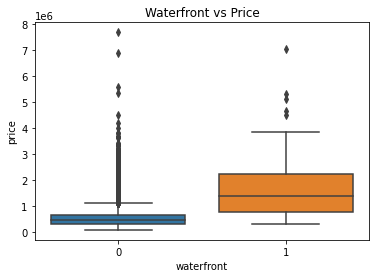

In [12]:
## using seaborn to plot

x=df['waterfront']
y=df['price']

sns.boxplot(x,y)
plt.title("Waterfront vs Price")

#### Plotting regplot for 'sqft_above to determine if the feature is negatively or positively correlated with 'price'

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

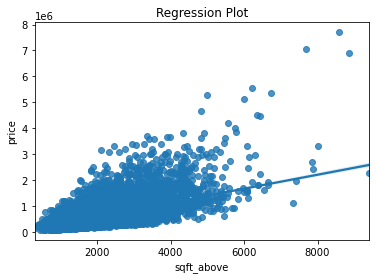

In [13]:
##using seaborn to plot regression

sns.regplot(df['sqft_above'], df['price'])
plt.title("Regression Plot")

In [14]:
print("It is positively correlated")

It is positively correlated


#### Fitting Linear Regression model to predict the price using the feature 'sqft_living' then calculating the R^2

In [16]:
##using LinerRegression()

X = df[['sqft_living']]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)
q=lm.predict(X)

print("The predicted Values are:" + str(q))

The predicted Values are:[287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]


In [17]:
print("The R2 value is: ",lm.score(X, Y))

The R2 value is:  0.4928532179037931


#### Fitting a Linear Regression model to predict the 'price' using the list of features "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"

In [19]:
## using features to predict price

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[features]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X,Y)

pre=lm1.predict(X)
print("The predicted values are:"+str(pre))

The predicted values are:[283270.3900746  662572.30128725 306267.58455146 ... 304248.55129945
 428758.80343249 304046.65336995]


In [20]:
print("The R2 vaue is",lm1.score(X, Y))

The R2 vaue is 0.65769516660375


#### Creating tuples, the first element in the tuple contains the name of the estimator while the second is model constructor

In [21]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Creating a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model.

In [22]:
##using Pipeline()

pipe = Pipeline(Input)
pipe.fit(df[features], Y)

xqc=pipe.predict(df[features])
print("The predicted values are : "+str(xqc))

The predicted values are : [349638.25 559087.75 449484.25 ... 417210.25 459661.75 417158.25]


In [23]:
print("The R^2 score value is : ",pipe.score(df[features], Y))

The R^2 score value is :  0.751340400512126


#### Importing necessary libraries

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#### Creating testing and training sets

In [25]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#### Creating and fitting a Ridge regression object using the training data, setting the regularization parameter to 0.1

In [26]:
##using ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)

x=RidgeModel.predict(x_test)
print("The predicted values are : "+str(x))

The predicted values are : [651781.17964158 514958.12791319 794388.65874943 ... 699470.4139
 621518.44005307 376624.68877618]


In [27]:
print("The R2 Score value is mentioned as : ",RidgeModel.score(x_test, y_test))

The R2 Score value is mentioned as :  0.6478759163939112


#### Performing a second order polynomial transform on both the training data and testing data. Then creating and fitting a Ridge Regression object using the training data, setting the regularisation parameter to 0.1

In [28]:
## creating ridge regression

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

print("The R^2 Score value for the training data is : " + str(RidgeModel.score(x_train_pr, y_train)))
print("The R^2 Score value for the testing data is : " + str(RidgeModel.score(x_test_pr, y_test)))

The R^2 Score value for the training data is : 0.741816743878655
The R^2 Score value for the testing data is : 0.7002744262868896
